<a href="https://colab.research.google.com/github/joannahanchang/Bootstrap-Project-Setup/blob/master/iKala_Philippines_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import & Download**

In [ ]:
GOOGLE_COLAB = True

In [ ]:
!pip install -q keras
!pip install livelossplot
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-lvli5ud1
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-lvli5ud1
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-cp36-none-any.whl size=33792 sha256=e3b876367ebbfcd0002d67582b72b582305d018b5f482689a4020c27f0d7632f
  Stored in directory: /tmp/pip-ephem-wheel-cache-ixtt6jkc/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


In [ ]:
import numpy as np
import pandas as pd 
import keras

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
# from keras import applications
# from keras.optimizers import SGD
# from keras import backend as K
# from keras.callbacks import CSVLogger
# from keras.layers import Input 
# from keras.models import Model 
# from keras.layers import Dense 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dropout, Dense, Flatten, GlobalMaxPooling2D
from keras.layers import Conv2D, Activation, MaxPooling2D
from keras.callbacks import CSVLogger
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn

**Data Loading & Setup**

In [ ]:
TRAINING_LOGS_FILE = 'training_logs.csv'
MODEL_SUMMARY_FILE = 'model_summary.txt'
TEST_FILE = 'test_file.txt'
MODEL_FILE = 'receipts_vs_nonreceipts.h5'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
training_data_dir = '/content/drive/My Drive/Colab Notebooks/Data/Training'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/Data/Validation'
test_data_dir = '/content/drive/My Drive/Colab Notebooks/Data/Test'

**Hyperparameter**

In [ ]:
IMAGE_SIZE = 200
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
BATCH_SIZE = 60
EPOCHS = 100
TEST_SIZE = 30

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

# IMAGE_SIZE = 200
# IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
# BATCH_SIZE = 60
# EPOCHS = 50
# TEST_SIZE = 30

# input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

# IMAGE_SIZE = 200
# IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
# BATCH_SIZE = 32
# EPOCHS = 20
# TEST_SIZE = 30

# input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

**CNN EfficientNet (https://arxiv.org/abs/1905.11946)**

In [ ]:
model = Sequential()
efficient_net = efn.EfficientNetB7(weights='imagenet', include_top=False, input_shape=input_shape)
#efficient_net.trainable = False
for index, layer in enumerate(efficient_net.layers):
    if index < 761:
        layer.trainable = False

    print(index)
    print(layer)
model.add(efficient_net)
#model.add(GlobalMaxPooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Flatten())
# if dropout_rate > 0:
#     model.add(layers.Dropout(dropout_rate, name="dropout_out"))
# model.add(layers.Dense(256, activation='relu', name="fc1"))
model.add(Dense(1, activation='sigmoid')) #, name="output"
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x7f7a3fabbc50>
25
26
27
28
29
30
31
32
33
34
35
36
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x7f7a43e18dd8>
37
38
39
40
41
42
43
44
45
46
47
48
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x7f7a44313f98>
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x7f7a3d9bff98>
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x7f7a434ecdd8>
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x7f7a437bcfd0>
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
<efficientnet.model.get_dropout.<locals>.FixedDropout object at 0x7f7a43ab6978>
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
<e

**CNN Model #6**

In [ ]:
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(512, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 

**Data Augmentation**

In [ ]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

**Data Preparation**

In [ ]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 776 images belonging to 2 classes.
Found 159 images belonging to 2 classes.
Found 161 images belonging to 2 classes.


**Training**

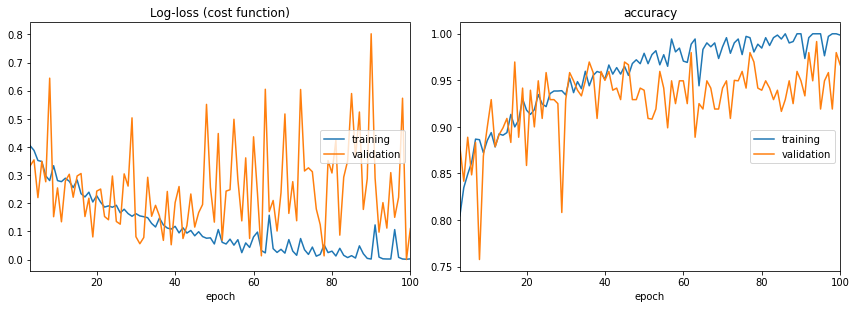

Log-loss (cost function):
training   (min:    0.001, max:    0.636, cur:    0.002)
validation (min:    0.000, max:    0.802, cur:    0.110)

accuracy:
training   (min:    0.672, max:    1.000, cur:    0.999)
validation (min:    0.667, max:    0.992, cur:    0.967)


In [ ]:
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[PlotLossesCallback(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)
model.save_weights(MODEL_FILE)

**Testing**

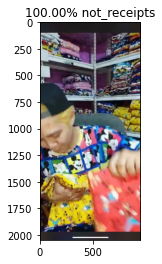

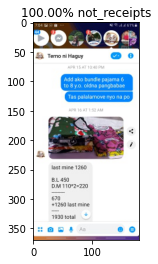

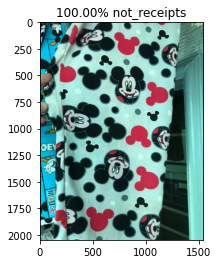

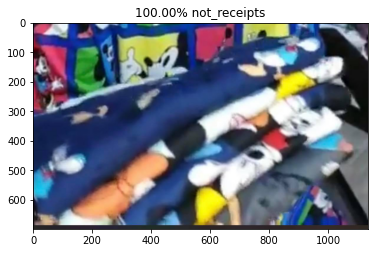

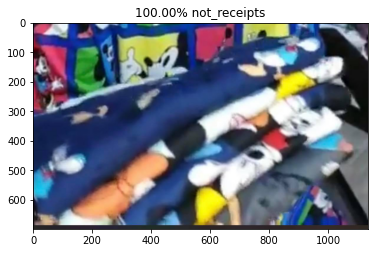

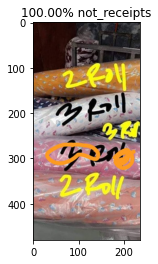

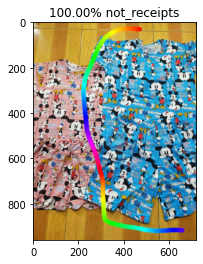

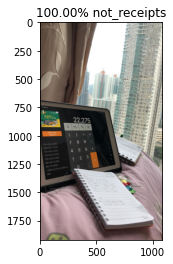

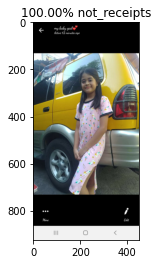

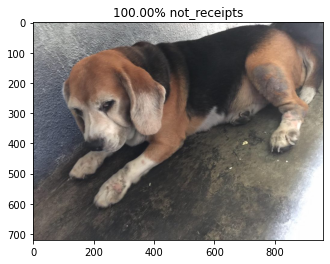

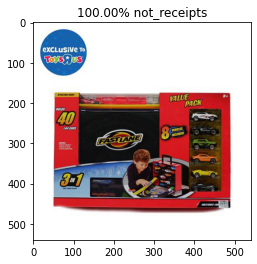

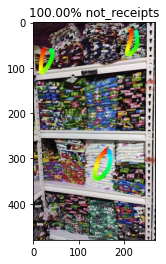

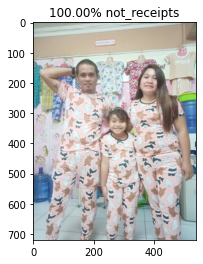

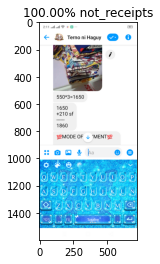

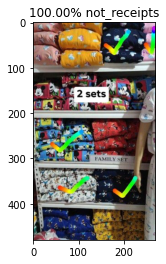

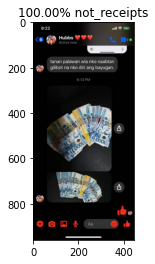

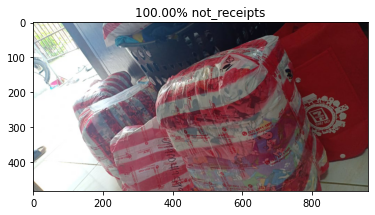

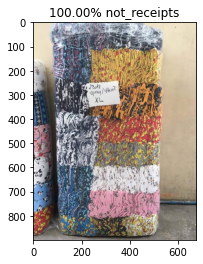

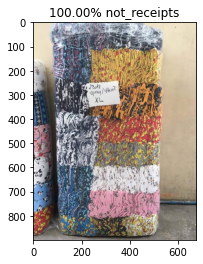

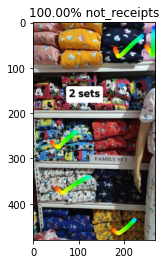

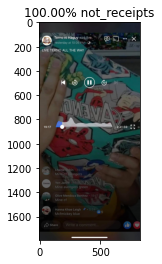

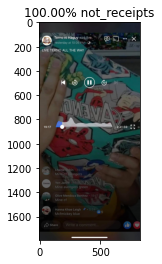

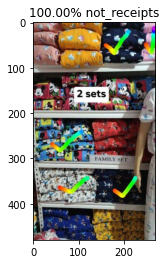

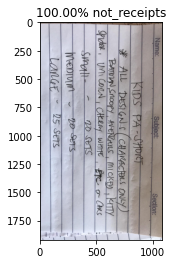

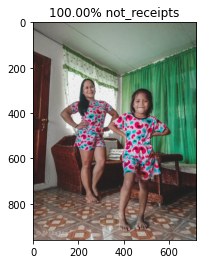

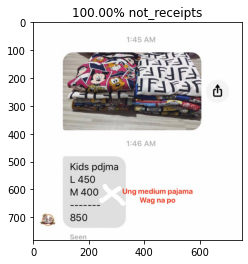

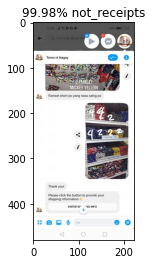

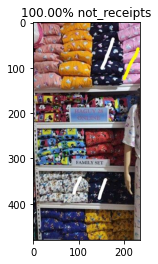

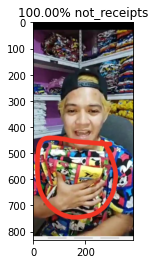

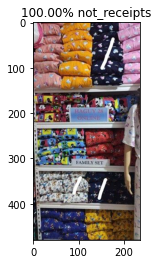

In [ ]:
probabilities = model.predict_generator(test_generator, TEST_SIZE)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% receipts")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% not_receipts")
    plt.show()

**If running models, move a model from below to above Data Augmentation and below CNN EfficientNet**

**CNN Model #1 (https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8)**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(16))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

**CNN Model #2 (https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8)**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

**CNN Model #3 (https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8)**

In [ ]:
	model = Sequential()

	model.add(Conv2D(32, (3, 3), input_shape=input_shape))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Conv2D(64, (3, 3)))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Conv2D(128, (3, 3)))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Flatten())
	model.add(Dense(64))
	model.add(Activation('relu'))
	model.add(Dense(1))
	model.add(Activation('sigmoid'))

	model.compile(loss='binary_crossentropy',
          		optimizer='rmsprop',
          		metrics=['accuracy'])
 
	with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

**CNN Model #4 (https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8)**

In [ ]:
	model = Sequential()

	model.add(Conv2D(32, (3, 3), input_shape=input_shape))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Conv2D(64, (3, 3)))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Conv2D(128, (3, 3)))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Flatten())
	model.add(Dense(128))
	model.add(Activation('relu'))
	model.add(Dropout(0.5))
	model.add(Dense(1))
	model.add(Activation('sigmoid'))

	model.compile(loss='binary_crossentropy',
          		optimizer='rmsprop',
          		metrics=['accuracy'])
 
	with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

**CNN Model #5 (https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8)**

In [ ]:
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 